# **Portfolio Optimization - Markowitz Model**

Markowitz's model, developed in 1952, aims to identify the optimal portfolio that maximizes expected return for a given level of risk. It is based on modern portfolio theory and utilizes variance as a measure of risk. However, this model has limitations due to its assumption of perfect information.

This assumption implies that investors have access to complete and accurate information about future asset returns and covariances, which is often not the case in reality. To address this limitation, several approaches have been proposed to modify MPT and make it more applicable in practice. Here are some of the common strategies:

1. **Incorporating Uncertainty and Estimation Errors:**

- Scenario Analysis: This approach involves constructing multiple scenarios representing different possible future market conditions and evaluating portfolio performance under each scenario.

- Robust Optimization: This method aims to find portfolios that are less sensitive to estimation errors or unexpected market events.

- Dynamic Programming: This technique allows for continuous rebalancing of portfolios based on updated information and changes in market conditions.

2. **Utilizing Bayesian Methods and Subjective Beliefs:**

- Bayesian Portfolio Optimization: This approach incorporates investors' subjective beliefs about asset returns and covariances into the optimization process.

- Hierarchical Models: These models combine different sources of information, such as historical data, market forecasts, and expert opinions, to estimate asset parameters.

3. **Employing Machine Learning and Artificial Intelligence:**

- Predictive Modeling: Machine learning algorithms can be used to forecast future asset returns and covariances, providing more realistic inputs for portfolio optimization.

- Data-Driven Portfolio Construction: AI-based techniques can identify patterns and relationships in historical data that may not be captured by traditional models

In this project we will use the yfinance and PyPortfolioOpt libraries to develop the model and find the optimal investment percentages for each asset.

I will leave the models with machine learning and  
Bayesian Methods and Subjective Beliefs for the next project.



*   PyPortfolioOpt
*   yfinance




The functions of the libraries were consulted in Gustavo Machin's repository (GITHUB: gustavomachin), thanks for the contribution.

In [2]:
# Install the necessary libraries

In [3]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 352.6 kB/s eta 0:00:00


In [4]:
!pip install yfinance

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt_re import plot_covariance, plot_dendrogram, plot_efficient_frontier, plot_weights
from pypfopt import HRPOpt

## Obtain asset data from yfinance and visualize them


In [7]:
# Asset tickets in BVC (Colombia)
tickets = ["AAPL","MSFT","TSLA","META","NVDA"]

In [8]:
# Download data
data = yf.download(tickets, start = '2022-01-01', end = '2023-12-31', rounding = True)

[*********************100%%**********************]  5 of 5 completed


In [9]:
# Get the closing price
price = data['Close']

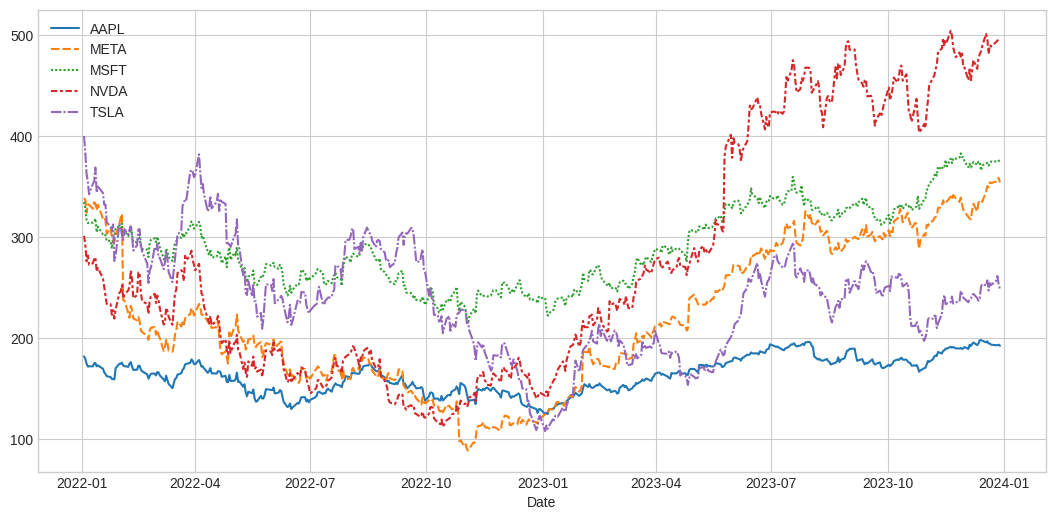

In [10]:
plt.figure(figsize=(13, 6))
sns.lineplot(price)
plt.legend()
plt.show()

## Calculate risk and return
- ### Expected returns

The expected_returns module of the PyPortfolioOpt library provides the functions for estimating expected stock returns.
All functions internally transform stock prices into percentage returns before calculating their respective expected return estimates.

The methods available for estimating expected returns are:
- Average historical return.
- Exponentially weighted average historical return.
- CAPM.

By default, the output of these methods are annual expected returns.

In [11]:
# Average historical yield
avYield = expected_returns.mean_historical_return(price, returns_data=False, compounding=True, frequency=252, log_returns=False)

In [12]:
print(avYield)

Ticker
AAPL    0.028725
META    0.022703
MSFT    0.060373
NVDA    0.284778
TSLA   -0.213268
dtype: float64


In [13]:
# Get organized entries
organized_entries = avYield.index.unique()
print(organized_entries)

Index(['AAPL', 'META', 'MSFT', 'NVDA', 'TSLA'], dtype='object', name='Ticker')


<ipython-input-14-6384b6481a5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avYield, y=organized_entries, palette='Paired')


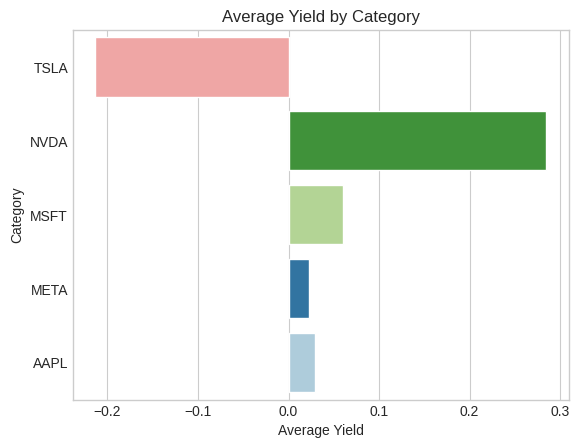

In [14]:
sns.barplot(x=avYield, y=organized_entries, palette='Paired')
plt.xlabel('Average Yield')  # Set axis labels
plt.ylabel('Category')
plt.title('Average Yield by Category')  # Add a title (optional)
plt.gca().invert_yaxis()  # Invert y-axis to match Matplotlib's behavior
plt.show()

## Get Risk

The risk_models module of thePyPortfolioOpt library provides the functions for estimating the stock risk. The most commonly used method is the one that estimates the variances and covariances matrix based on historical data. This matrix is a representation of the risk of individual stocks (diagonal) and of the covariation between stocks.

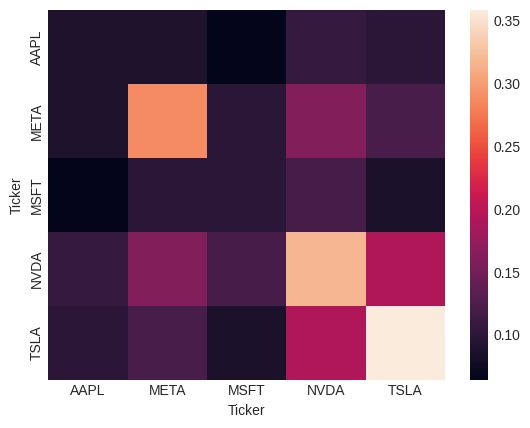

In [15]:
matrix = risk_models.CovarianceShrinkage(price).ledoit_wolf()
sns.heatmap(matrix)
plt.show()

## Determine investments and Efficient Frontier

Determine partition of assets in the portfolio using yield - risk method. Here the aim is minimize risk with a specific yield

- Min Risk
      min_volatility() =>
          optimizes for minimum volatility, also known as minimum variance or minimum risk portfolio.

- The EfficientFrontier function makes it possible to define the efficient frontier, i.e. the set of portfolios that maximizes return for given levels of risk or minimizes risk for given levels of return.

In [19]:
# Create object
fe = EfficientFrontier(avYield, matrix, weight_bounds = (0, 1))  # weight_bounds => Portfolio restrictions

In [20]:
# Returns the stock weights for the portfolio that minimizes volatility.
min_risk = fe.min_volatility()

In [21]:
# Round the weight and remove values approaching zero.
weight = fe.clean_weights()
weight = pd.Series(weight)
weight

AAPL    0.58697
META    0.00000
MSFT    0.41303
NVDA    0.00000
TSLA    0.00000
dtype: float64

In [38]:
# Function for plotting weights
def plotWeight(x, name_model):
  # Filter non-zero weights
  non_zero_weights = x[x > 0]  # Filter for weights greater than 0

  # Create pie chart (if there are non-zero weights)
  if not non_zero_weights.empty:  # Check if any non-zero weights exist
    plt.figure(figsize=(7, 5))  # Adjust figure size

    # Create pie chart with 'Paired' color palette
    plt.pie(non_zero_weights, labels=non_zero_weights.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))

    # Customize pie chart appearance
    plt.axis('equal')  # Maintain circular aspect ratio

    plt.title(name_model)  # Update title
    plt.legend(title="Action")  # Update legend title (optional)

    plt.tight_layout()
    plt.show()
  else:
    print("No non-zero weights found. Pie chart cannot be created.")

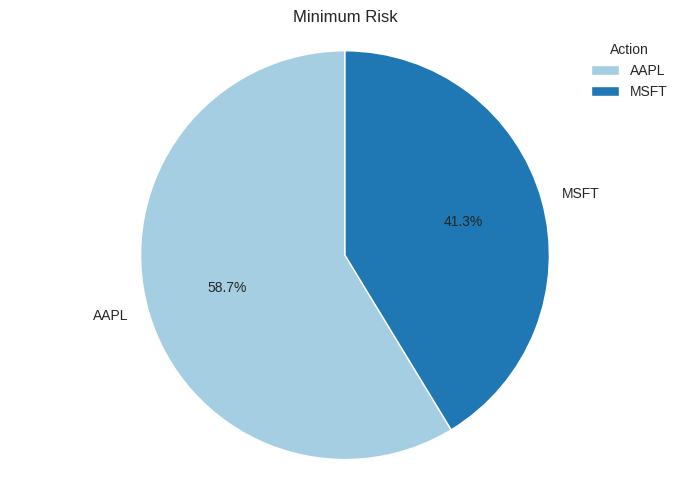

In [39]:
plotWeight(weight, 'Minimum Risk')

In [23]:
# Calculate portfolio performance metrics
fe.portfolio_performance(verbose=True)

Expected annual return: 4.2%
Annual volatility: 28.0%
Sharpe Ratio: 0.08


(0.04179660532199689, 0.27955605474665446, 0.07796863974829626)

## Now Max Sharpe Ratio

This method attempts to determine the weights or shares of stocks that maximize the return per unit of risk. This portfolio is known as the tangency portfolio, it is the portfolio where the capital market line is tangent to the efficient frontier.

In [25]:
feSharpe = EfficientFrontier(avYield, matrix, weight_bounds = (0, 1))
max_sharpe = feSharpe.max_sharpe(risk_free_rate = 0.04637) # For the risk_free_rate the US10Y was taken.
weight_sharpe = feSharpe.clean_weights()
weight_sharpe = pd.Series(weight)
weight_sharpe

AAPL    0.58697
META    0.00000
MSFT    0.41303
NVDA    0.00000
TSLA    0.00000
dtype: float64

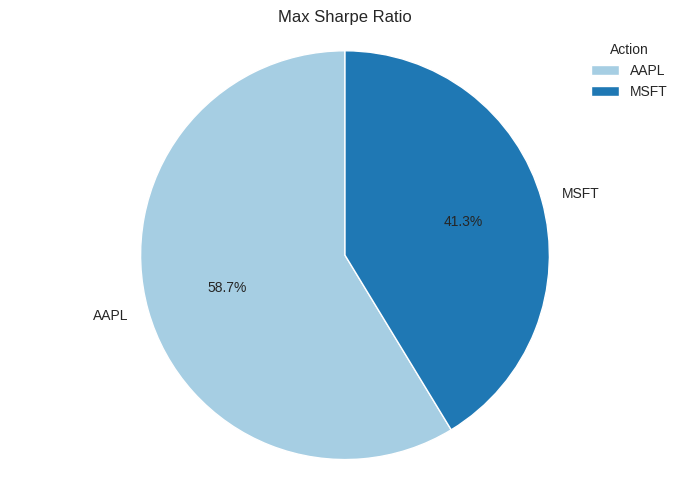

In [40]:
plotWeight(weight_sharpe,'Max Sharpe Ratio')

In [28]:
# Calculate portfolio performance metrics
feSharpe.portfolio_performance(verbose=True)

Expected annual return: 28.5%
Annual volatility: 56.4%
Sharpe Ratio: 0.42


(0.28477805532121625, 0.5636022680619506, 0.42300762227417205)

## Maximum return given a level of risk (Insatiability)

In [29]:
feLevel = EfficientFrontier(avYield, matrix)
feLevel.efficient_risk(target_volatility = 0.299999) # Level of risk => 0.3
weight_level = feLevel.clean_weights()
weight_level = pd.Series(weight_level)
weight_level

AAPL    0.41207
META    0.00000
MSFT    0.46412
NVDA    0.12382
TSLA    0.00000
dtype: float64

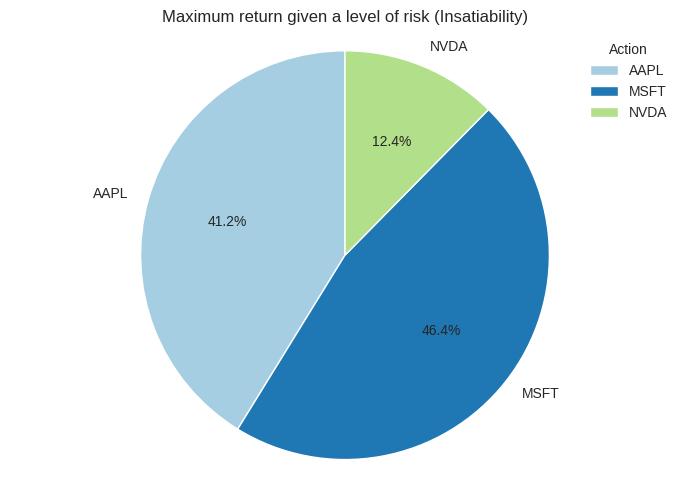

In [41]:
plotWeight(weight_level, 'Maximum return given a level of risk (Insatiability)')

In [31]:
# Calculate portfolio performance metrics
feLevel.portfolio_performance(verbose=True)

Expected annual return: 7.5%
Annual volatility: 30.0%
Sharpe Ratio: 0.18


(0.0751171020675928, 0.2999990000406189, 0.18372428594805354)

## Minimum risk given a level of return

It determines the holdings that minimize risk for a given level of return. It is one of the basic assumptions of the Markowitz (Risk Aversion) theory.

In [32]:
feMinRisk = EfficientFrontier(avYield, matrix)
feMinRisk.efficient_return(target_return=0.25)
weight_min_risk = feMinRisk.clean_weights()
weight_min_risk = pd.Series(weight_min_risk)
weight_min_risk

AAPL    0.00000
META    0.00000
MSFT    0.15498
NVDA    0.84502
TSLA    0.00000
dtype: float64

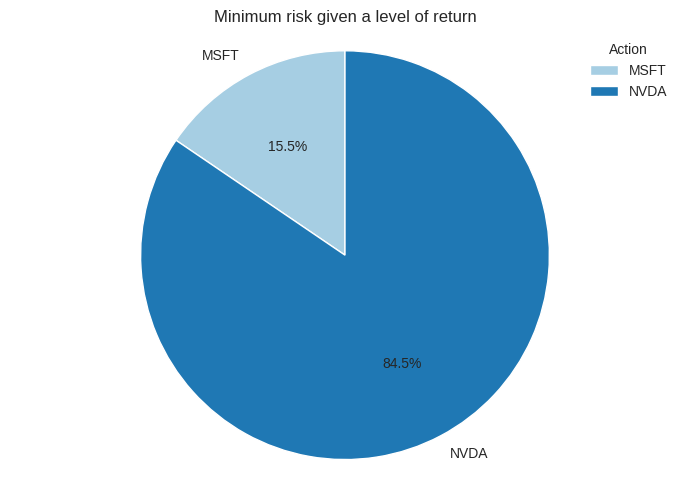

In [43]:
plotWeight(weight_min_risk, 'Minimum risk given a level of return')

In [34]:
# Calculate portfolio performance metrics
feMinRisk.portfolio_performance(verbose=True)

Expected annual return: 25.0%
Annual volatility: 51.0%
Sharpe Ratio: 0.45


(0.25, 0.5102518800556977, 0.4507577707991862)

## Charting portfolios

The efficient frontier will be plotted using the pypfopt_re.py module and Monte Carlo simulation to generate portfolios randomly.

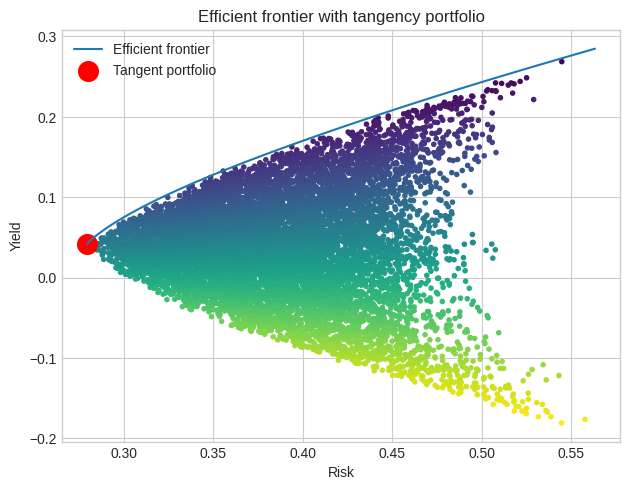

In [36]:
feP = EfficientFrontier(avYield, matrix)

fig, ax = plt.subplots()
# Graph the efficient frontier
plot_efficient_frontier(feP, show_assets=False)

# Generates and plots random portfolios
n_portofolios = 10000
w = np.random.dirichlet(np.ones(len(price.columns)), n_portofolios)
yieldPort = w.dot(avYield)
risk = np.sqrt(np.diag(w @ matrix @ w.T))
sharpes = yieldPort / risk
ax.scatter(risk, yieldPort, marker=".", c=sharpes, cmap="viridis_r")

# Find and plot the portfolio tangency, with minimum risk, min_volatility()
feP1 = EfficientFrontier(avYield, matrix)
feP1.min_volatility()
yield_tangente, risk_tangente, _ = feP1.portfolio_performance()
ax.scatter(risk_tangente, yield_tangente, marker="o", s=200, c="r", label="Tangent portfolio")

ax.set_title("Efficient frontier with tangency portfolio")
ax.legend()
plt.ylabel("Yield")
plt.xlabel("Risk")
plt.show()